In [1]:
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
music_pd=pd.read_csv('full_music_data.csv')
music_pd=music_pd.drop(['artist_names','artists_id','release_date','song_title (censored)','explicit'],axis=1)

In [3]:
for col in music_pd.columns:
    if(col=='year'): continue
    music_pd[col]=(music_pd[col]-music_pd[col].mean())/(music_pd[col].std())

In [4]:
music_cnt=music_pd.reset_index()
music_cnt=music_cnt.groupby('year').agg({
    'index':'count'
})
drop_list=[i for i in range(1924,1935)]
drop_list.append(1921)
music_cnt=music_cnt.drop(drop_list,axis=0).reset_index()
music_cnt.columns=['year','cnt']
music_cnt['cnt']=(music_cnt['cnt']-music_cnt['cnt'].mean())/music_cnt['cnt'].std()

In [5]:
music_pd=music_pd.groupby('year').mean().reset_index()

In [6]:
music_pd=pd.merge(music_pd,music_cnt,on='year',how='left')
music_pd=music_pd.drop(0).reset_index().drop(['index'],axis=1)

In [7]:
music_pd=music_pd.dropna(how='any').reset_index().drop(['index'],axis=1)

In [8]:
weight=[0.52,6.39,0.72,0.10,15.29,0.24,0.06,16.32,20,0.52,1.62,0.63,21.44,16.17]
lab=[col for col in music_pd.columns]
lab.pop(0)
key_to_weight={}
for i in range(len(lab)):
    key_to_weight[lab[i]]=weight[i]
def cal2(x):
    res=0
    cur=0
    for key,val in music_pd.loc[x].to_dict().items():
        if(key=='year'): continue
        res+=val*weight[cur]
        cur+=1
    return res
y=[]
for i in range(music_pd.shape[0]):
    y.append(cal2(i))

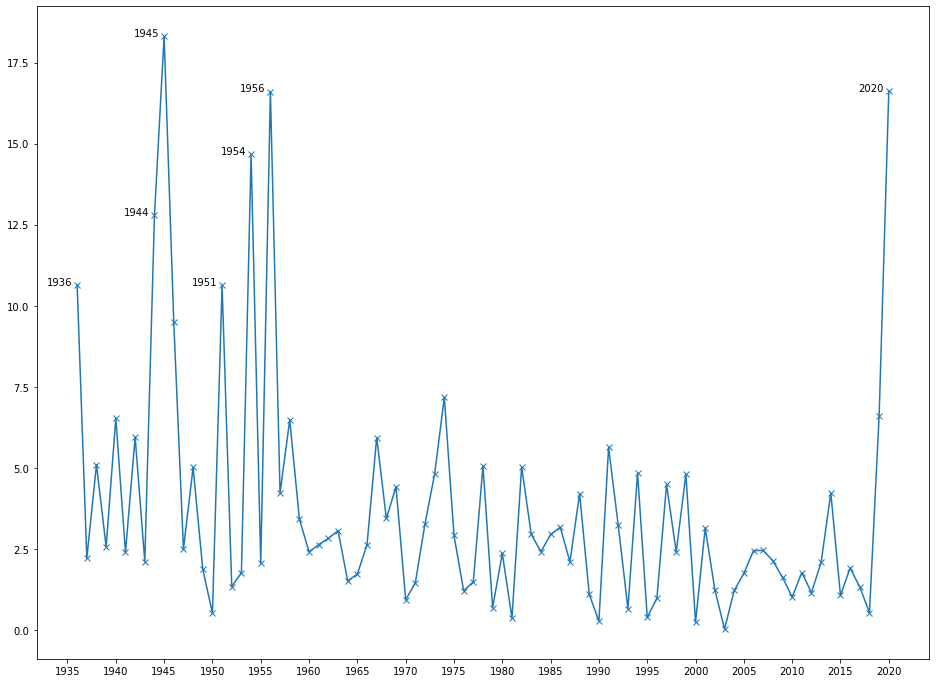

In [9]:
x=[i for i in range(1936,2021)]
plt.figure(figsize=(16,12))
plt.xticks([i for i in range(1935,2021,5)])
yp=[abs(y[i+1]-y[i]) for i in range(len(y)-1)]
for i in range(len(yp)):
    if(yp[i]>10):plt.text(s=str(1936+i),x=1936+i-0.5,y=yp[i],horizontalalignment='right')
plt.plot(x,yp,marker='x')
plt.savefig("change_per_year.jpg")

In [10]:
music_pd

,year,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity,cnt
0,1935,-0.254125,-1.122849,-0.146474,-0.245132,-1.000663,-0.088729,-0.096018,1.386522,0.303410,0.138793,0.518887,-0.144345,-1.920409,-1.830192
1,1936,0.163216,-0.938447,0.149262,-0.160751,-0.495948,0.020657,0.139110,1.333807,0.340364,0.041071,0.007060,-0.546124,-1.874330,-1.735633
2,1937,0.658725,-0.959747,0.581600,0.027566,-0.459945,-0.073054,0.030401,1.328764,0.192378,-0.040259,0.154417,-0.587084,-1.705040,-1.705303
3,1938,-0.624943,-1.326984,-0.378046,-0.157044,-1.053301,0.285069,-0.002277,1.465011,0.685687,-0.139649,-0.222027,0.776123,-1.917989,-1.712439
4,1939,-0.050501,-1.191645,0.005391,-0.456794,-0.804385,-0.112634,-0.092925,1.469240,0.151222,0.079376,0.175211,-0.496404,-1.730665,-1.776668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2016,0.328328,0.329371,-0.295821,0.015274,0.774525,-0.219613,0.046227,-0.453709,-0.345382,-0.137040,0.339009,-0.066958,1.560774,-0.902441
82,2017,0.579913,0.295946,-0.292730,0.001974,0.790136,-0.253250,-0.002586,-0.467647,-0.388132,-0.171826,0.292165,-0.145752,1.791521,-1.059445
83,2018,0.607079,0.396998,-0.311353,-0.013799,0.904433,-0.162655,0.058564,-0.538755,-0.417199,-0.211882,0.341246,-0.227689,1.896635,-1.207529
84,2019,0.665981,0.358437,-0.127830,-0.059666,0.858864,-0.189101,0.016915,-0.471521,-0.382744,-0.206100,0.408721,-0.236629,2.095767,-1.130811


In [11]:
artist_pd=pd.read_csv('full_music_data.csv')
artist_pd=artist_pd.drop(['artist_names','release_date','song_title (censored)','explicit'],axis=1)
artist_pd

,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity,year
0,[178301],0.600,0.365,0.131,130.046,-13.083,0,9,0.06720,0.585000,0.0921,0.0498,437200,54,2005
1,[178301],0.874,0.326,0.179,119.620,-13.302,0,11,0.01360,0.148000,0.0993,0.1310,581008,53,2005
2,[178301],0.670,0.531,0.336,139.385,-8.267,0,9,0.01560,0.345000,0.3060,0.0377,431293,55,2009
3,[625201],0.761,0.702,0.850,104.773,-8.523,1,7,0.10800,0.000031,0.0935,0.0389,304427,34,1991
4,[625201],0.661,0.828,0.902,115.078,-12.673,0,11,0.27600,0.000001,0.2870,0.0390,264933,37,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98335,[690254],0.276,0.892,0.715,80.475,-7.035,1,11,0.40900,0.000000,0.7140,0.0893,115973,33,1975
98336,[690254],0.700,0.592,0.906,109.847,-10.434,1,11,0.10800,0.018400,0.1180,0.0681,263627,32,1976
98337,[690254],0.709,0.709,0.863,111.544,-12.023,1,2,0.11800,0.000011,0.1250,0.0370,158400,31,1987
98338,[690254],0.552,0.651,0.533,161.548,-10.624,0,4,0.00494,0.034900,0.1320,0.2290,232533,43,1992


In [12]:
for col in artist_pd.columns:
    if(col=='year' or col=='artists_id'): continue
    artist_pd[col]=(artist_pd[col]-artist_pd[col].mean())/(artist_pd[col].std())

In [13]:
year_data={}
for i in range(music_pd.shape[0]):
    year_data[int(music_pd.loc[i].year)]=music_pd.loc[i].drop('year').to_dict()

In [19]:
score={}
def dis(x,y):
    res=0
    cnt=0
    for key,val in year_data[y].items():
        if(key=='cnt'):continue
        res+=(val-x[key])*(val-x[key])*key_to_weight[key]
    return 1/math.sqrt(res)
for i in range(artist_pd.shape[0]):
    cur=artist_pd.loc[i]
    if(cur.year!=2020): continue
    w=dis(cur.drop(['artists_id','year']),int(cur.year))*yp[cur.year-1936]
    artist_id=cur.artists_id.lstrip('[').rstrip(']').split(',')
    for st in artist_id:
        if(score.setdefault(st)==None):
            score[st]=w
        else:
            score[st]+=w

In [20]:
apd=pd.read_csv('full_music_data.csv')
id_to_name={}
def get(name):
    name.lstrip(" ")
    if(name[0]=='\''):
        for i in range(1,len(name)):
            if(name[i]=='\''):
                break
        return name[1:i],name[i+1:]
    elif name[0]=='\"':
        for i in range(1,len(name)):
            if(name[i]=='\"'):
                break
        return name[1:i],name[i+1:]
apd
for i in range(apd.shape[0]):
    names=[]
    name=apd.loc[i].artist_names.lstrip("[").rstrip(']').replace(",","")
    while len(name)!=0:
        res,name=get(name)
        name=name.lstrip(" ")
        names.append(res)
    ids=apd.loc[i].artists_id.lstrip("[").lstrip('\"').rstrip(']').rstrip('\"').split(",")
    if(len(ids)<len(names)):
        for j in range(1,len(names)):
            names[0]+=','+names[j]
        del names[1:]
    if(len(ids)!=len(names)):
        print(names,ids)
    for j in range(len(ids)):
        if(id_to_name.setdefault(ids[j])==None):
            id_to_name[ids[j]]=names[j]

In [21]:
score_sorted=sorted(score.items(),key=lambda x:x[1],reverse=True)
score_sorted

[('3314964', 81.99741393601663),
 ('2674162', 79.01646465994925),
 ('2165952', 57.84301709529905),
 ('2986022', 53.086276632381384),
 ('3226468', 52.37072668906671),
 ('3426731', 45.96714492978206),
 ('2674420', 41.0549753247087),
 ('2385504', 40.704656766076866),
 ('3185359', 37.29856490133734),
 ('2775792', 34.3804052917688),
 ('312890', 29.235797015134743),
 ('2739175', 26.299108423640643),
 ('568137', 24.825420846589985),
 ('2014409', 24.47714308339598),
 ('996096', 24.432093479957675),
 ('793225', 23.999696477727838),
 ('994823', 21.279562025066706),
 ('2854547', 18.46363475816917),
 ('68551', 18.363241039632896),
 ('746409', 18.217664314502787),
 ('128143', 17.835537274834852),
 ('3632715', 17.70016714580514),
 ('266063', 16.586817600288704),
 ('3345212', 16.21044505212183),
 ('2487188', 15.861959499860617),
 ('2659130', 14.546987923604604),
 ('1596642', 13.747801023810485),
 ('2942900', 12.890676064730478),
 ('364537', 12.785898205848994),
 ('559405', 12.61622372135465),
 ('6647

In [22]:
with open('artist_revolution_2020.csv','w+',encoding='utf-8') as f:
    for i in range(len(score_sorted)):
        f.write(id_to_name[score_sorted[i][0]]+","+str(score_sorted[i][1])+"\n")